In [1]:
import keras
import numpy as np
import os
import pandas as pd
import sys
import tensorflow as tf

nvflare_app_dir = os.path.join('..', 'nvflare-sverepec_24-sim')
data_dir = os.path.join(nvflare_app_dir, 'data')
app_server_dir = os.path.join(nvflare_app_dir, 'workspace', 'simulate_job', 'app_server')

sys.path.append(nvflare_app_dir)
from app.custom.tf2_net import Net

from IPython.display import JSON, HTML
from nvflare.fuel.utils import fobs
from nvflare.app_common.abstract.model import ModelLearnable, make_model_learnable
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

summary_line_length = 128

## load global model

In [2]:
model_filename = os.path.join(app_server_dir, 'model.h5')
m = tf.keras.models.load_model(model_filename, custom_objects={'Net': Net})
m.summary(line_length=summary_line_length, expand_nested=True)

Model: "model_10"
________________________________________________________________________________________________________________________________
 Layer (type)                                            Output Shape                                       Param #             
 input_11 (InputLayer)                                   [(None, 474)]                                      0                   
                                                                                                                                
 net (Net)                                               (None, 8)                                          8072                
|¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯|
| fullyConnectedLayer1 (Dense)                          multiple                                           7600                |
|                                                                              

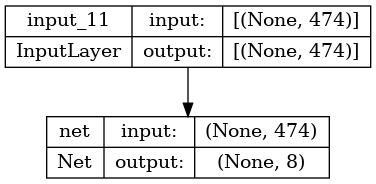

In [3]:
tf.keras.utils.plot_model(
    m,
    expand_nested=True,
    show_shapes=True,
    show_layer_activations=True
)

## load label encoder

In [4]:
label_encoder_filename = os.path.join(data_dir, 'encoder-DRUH_DR.npy')
label_encoder = LabelEncoder()
label_encoder.classes_ = np.load(label_encoder_filename, allow_pickle=True)

## load site data

In [5]:
site = 1
filename_test = os.path.join(data_dir, 'site-%s' % site, 'train.csv')
df_test = pd.read_csv(filename_test)
display(df_test)

,b1_12_10_2,b2_12_10_2,b3_12_10_2,b4_12_10_2,b5_12_10_2,b6_12_10_2,b7_12_10_2,b8_12_10_2,b9_12_10_2,b10_12_10_,...,b466_12_10,b467_12_10,b468_12_10,b469_12_10,b470_12_10,b471_12_10,b472_12_10,b473_12_10,b474_12_10,DRUH_DR
0,0.003256,0.003459,0.003376,0.003814,0.003755,0.003414,0.003936,0.003655,0.003531,0.004018,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,6
1,0.002676,0.002653,0.002513,0.003147,0.002964,0.003168,0.003149,0.002989,0.002751,0.003521,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,5
2,0.002956,0.002666,0.003345,0.002970,0.003288,0.003434,0.003415,0.003502,0.003294,0.003663,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,5
3,0.001260,0.001161,0.001261,0.001194,0.001069,0.001104,0.001200,0.000977,0.000851,0.001066,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,6
4,0.002075,0.001902,0.001919,0.002223,0.001967,0.001932,0.002116,0.001719,0.001839,0.001985,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1084,0.003141,0.003184,0.003278,0.003539,0.003509,0.003898,0.003862,0.003904,0.003349,0.004265,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,6
1085,0.004101,0.004266,0.004431,0.004709,0.004940,0.004782,0.004892,0.005039,0.004439,0.005431,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,5
1086,0.002692,0.002791,0.002960,0.003312,0.003301,0.003358,0.003232,0.003156,0.002803,0.003551,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,7
1087,0.001613,0.001621,0.001387,0.001754,0.001803,0.001840,0.001867,0.001709,0.001784,0.001970,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,6


## test model on the loaded site data

In [6]:
df = df_test

X = df[df.columns.drop(df.DRUH_DR.name)]

Y = df[df.DRUH_DR.name]
Y = label_encoder.inverse_transform(Y)
Y = pd.DataFrame(Y, columns=['Y'])

Y_pred = m.predict(X)
Y_pred = np.argmax(Y_pred, axis=1)
Y_pred = label_encoder.inverse_transform(Y_pred)
Y_pred = pd.DataFrame(Y_pred, columns=['Y_pred'])

display(pd.concat([Y, Y_pred], axis=1))

35/35 [==============================] - 1s 2ms/step


,Y,Y_pred
0,SM,OS
1,OS,OS
2,OS,OS
3,SM,OS
4,SM,OS
...,...,...
1084,SM,OS
1085,OS,OS
1086,VR,OS
1087,SM,OS


## confusion matrix

In [7]:
conf_matrix = pd.DataFrame(confusion_matrix(Y, Y_pred, labels=label_encoder.classes_))
conf_matrix.rename(columns=lambda x: label_encoder.inverse_transform([x])[0], inplace=True)
conf_matrix.rename(index=lambda x: label_encoder.inverse_transform([x])[0], inplace=True)
conf_matrix.set_index(pd.MultiIndex.from_product([['truth'], conf_matrix.index]), inplace=True)
conf_matrix.columns = pd.MultiIndex.from_product([['prediction'], conf_matrix.columns])
conf_matrix

prediction                       
                 BR CR DZ HB JH   OS SM VR
truth BR          0  0  0  0  0   20  0  0
      CR          0  0  0  0  0   16  0  0
      DZ          0  0  0  0  0    2  0  0
      HB          0  0  0  0  0    8  0  0
      JH          0  0  0  0  0    6  0  0
      OS          0  0  0  0  0  226  0  0
      SM          0  0  0  0  0  746  0  0
      VR          0  0  0  0  0   65  0  0